In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from lightgbm import LGBMClassifier
import sys

sys.path.append("..")
from src.utils import load_or_download_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### About The Dataset :

**age**: Age of the patient

**sex**: Sex of the patient
 - 1 = Male
 
 - 0 = Female

**cp**: Chest pain type
 - 0 = Typical Angina

 - 1 = Atypical Angina

 - 2 = Non-anginal Pain

 - 3 = Asymptomatic

**trtbps**: Resting blood pressure (in mm Hg)

**chol**: Cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl)
 - 1 = True

 - 0 = False

**restecg**: Resting electrocardiographic results
 - 0 = Normal 

 - 1 = ST-T wave normality

 - 2 = Left ventricular hypertrophy

**thalachh**: Maximum heart rate achieved

**oldpeak**: Previous peak. ST depression induced by exercise relative to rest

**slp**: Slope. The slope of the peak exercise ST segment
 - 0 = unsloping

 - 1 = flat

 - 2 = downsloping

**caa**: Number of major vessels ~ (0,3)

**thall**: Thalassemia. Thalium Stress Test result ~ (0,3)
 - 0 = null

 - 1 = fixed defect

 - 2 = normal

 - 3 = reversable defect

**exang**: Exercise induced angina 
 - 1 = Yes

 - 0 = No

**output**: Target variable. Diagnosis of heart disease (angiographic disease status)
 - 0 = < 50% diameter narrowing. less chance of heart disease

 - 1 = > 50% diameter narrowing. more chance of heart disease

In [8]:
heart_df =  load_or_download_data()
heart_df.head()

File found at ../data/raw/heart_disease_original_data.csv. Loading data...


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
heart_df.dropna(axis=0, inplace=True)

In [11]:
x = heart_df.iloc[:, 1:-1].values
y = heart_df.iloc[:, -1].values
x,y

(array([[  1.,   1., 145., ...,   3.,   0.,   6.],
        [  1.,   4., 160., ...,   2.,   3.,   3.],
        [  1.,   4., 120., ...,   2.,   2.,   7.],
        ...,
        [  1.,   4., 144., ...,   2.,   2.,   7.],
        [  1.,   4., 130., ...,   2.,   1.,   7.],
        [  0.,   2., 130., ...,   2.,   1.,   3.]]),
 array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
        1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
        1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
        1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
        0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
        1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1,
        0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0,
        0, 0,

In [12]:
y_bin = np.where(y > 0, 1, 0)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size= 0.2, random_state= 0)

In [14]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (237, 12) (237,)
Shape for testing data (60, 12) (60,)


In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train,x_test

(array([[-1.41421356,  0.86030302,  2.00921916, ...,  0.60949041,
          1.41086898,  0.62092128],
        [-1.41421356,  0.86030302, -0.16191929, ...,  0.60949041,
         -0.71215291, -0.91731925],
        [ 0.70710678,  0.86030302, -0.81326083, ...,  0.60949041,
         -0.71215291,  1.13366813],
        ...,
        [ 0.70710678,  0.86030302, -0.16191929, ..., -0.97786373,
          2.47237993,  1.13366813],
        [ 0.70710678,  0.86030302,  0.92364993, ...,  0.60949041,
         -0.71215291,  1.13366813],
        [ 0.70710678,  0.86030302,  0.65225763, ...,  0.60949041,
          1.41086898,  0.62092128]]),
 array([[ 7.07106781e-01, -2.24464850e+00, -8.13260825e-01,
         -1.20761374e+00, -4.36983723e-01,  1.03436270e+00,
          1.76643960e+00, -7.20576692e-01, -9.10050057e-01,
          6.09490408e-01, -7.12152913e-01,  6.20921283e-01],
        [-1.41421356e+00,  8.60303023e-01, -1.68171620e+00,
          3.33847403e-01, -4.36983723e-01,  1.03436270e+00,
         -1.

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree

Confusion Matrix for Logistic Regression: 
 [[28  2]
 [ 8 22]]
Accuracy of Logistic Regression: 83.33%
Precision of Logistic Regression: 91.67%
Recall of Logistic Regression: 73.33%
F1 Score of Logistic Regression: 81.48%


Confusion Matrix for Support Vector Classifier: 
 [[28  2]
 [ 8 22]]
Accuracy of Support Vector Classifier: 83.33%
Precision of Support Vector Classifier: 91.67%
Recall of Support Vector Classifier: 73.33%
F1 Score of Support Vector Classifier: 81.48%


[LightGBM] [Info] Number of positive: 107, number of negative: 130
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451477 -> initscore=-0.194706
[LightGBM] [Info] Start training from score -0.194706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

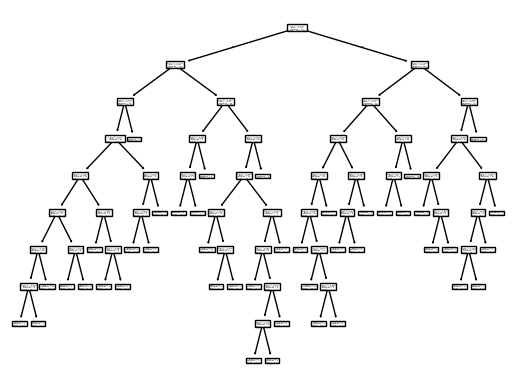

In [ ]:
# Define the models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'LightGBM Classifier': LGBMClassifier(force_row_wise=True, min_child_samples=1, num_leaves=31, min_split_gain=0),
    'Decision Tree': DecisionTreeClassifier()
}

# Iterate through the dictionary, fit each model, and print the results
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)

    # Compute confusion matrix
    conf = confusion_matrix(y_test, predicted)

    # Compute accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, predicted) * 100
    precision = precision_score(y_test, predicted, average='binary') * 100
    recall = recall_score(y_test, predicted, average='binary') * 100
    f1 = f1_score(y_test, predicted, average='binary') * 100

    if model_name== 'Decision Tree':
        plot_tree(model)

    # Print results
    print(f"Confusion Matrix for {model_name}: \n", conf)
    print(f"Accuracy of {model_name}: {accuracy:.2f}%")
    print(f"Precision of {model_name}: {precision:.2f}%")
    print(f"Recall of {model_name}: {recall:.2f}%")
    print(f"F1 Score of {model_name}: {f1:.2f}%")
    print("\n" + "="*60 + "\n")